In [ ]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import math
from scipy.linalg import expm
from matplotlib import pyplot as plt
import math
import scipy.stats
from scipy import integrate

In [ ]:
S0 =100
K= 100
r= 0.04
sigma = 0.4
T = 0.25

In [ ]:
W = np.sqrt(T)*np.random.randn(10000001,1)
ST = S0*np.exp( (r-sigma**2/2)*T + sigma*W)
estimated_variance1 = np.var(np.exp(-r*T)*np.maximum(ST-K,0))
estimated_variance3 = np.var(np.exp(-r*T)* ST/((ST/K)**2+1))
ST1 = ST.copy()
ST1[ST1[:]>K ] = 0
ST1[ST1[:]<K/2 ] = 0
ST1[ST1[:]>0 ]=1
estimated_variance2 = np.var(np.exp(-r*T)*ST1)
def ff1(x):
    return 3*np.sqrt(estimated_variance1)/np.sqrt(x)
def ff2(x):
    return 3*np.sqrt(estimated_variance2)/np.sqrt(x)
def ff3(x):
    return 3*np.sqrt(estimated_variance3)/np.sqrt(x)

In [ ]:
Max_MC = 100000
y1=np.zeros((Max_MC-1 ,1))
y2=np.zeros((Max_MC-1 ,1))
y3=np.zeros((Max_MC-1 ,1))
for M in range(20,Max_MC):
  W = np.sqrt(T)*np.random.randn(M,1)
  ST = S0*np.exp( (r-sigma**2/2)*T + sigma*W)
  y1[M-1] = np.mean(np.exp(-r*T)*np.maximum(ST-K,0))
  ST1 = ST.copy()
  ST1[ST1[:]>K ] = 0
  ST1[ST1[:]<K/2 ] = 0
  ST1[ST1[:]>0 ]=1
  y2[M-1] = np.mean(np.exp(-r*T)*ST1)
  y3[M-1]= np.mean(np.exp(-r*T)* ST/((ST/K)**2+1))

In [ ]:
d1 = (np.log(S0/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
d2 = d1-(sigma)*np.sqrt(T)
exact_price1 = S0*scipy.stats.norm(0, 1).cdf(d1)-K*np.exp(-r*T)*scipy.stats.norm(0, 1).cdf(d2)
print(exact_price1)

8.433318690109608


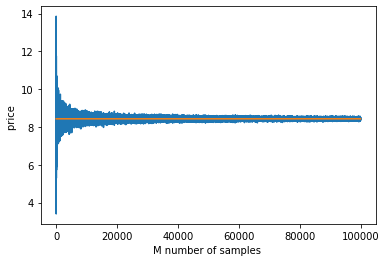

In [ ]:
plt.plot(np.arange(20,Max_MC-1),y1[20:])
plt.plot(np.arange(20,Max_MC-1),exact_price1*np.ones(len(np.arange(20,Max_MC-1))))
plt.ylabel('price ')
plt.xlabel('M number of samples ')

plt.show()

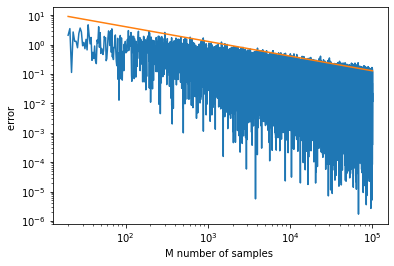

In [ ]:
plt.plot(np.arange(20,Max_MC-1),abs(y1[20:]-exact_price1))
plt.plot(np.arange(20,Max_MC-1),ff1(np.arange(20,Max_MC-1)))
plt.ylabel('error ')
plt.xlabel('M number of samples ')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
K2 = 1/(sigma)*(np.log(K/(S0*np.exp((r-0.5*sigma**2)*T))))
K1 = 1/(sigma)*(np.log(K/(2*S0*np.exp((r-0.5*sigma**2)*T))))
alpha1 = K1*(1/np.sqrt(T))
alpha2= K2*(1/np.sqrt(T))
exact_price2 = np.exp(-r*T)*(1-scipy.stats.norm(0, 1).cdf(alpha1)-scipy.stats.norm(0, 1).cdf(-alpha2))

In [ ]:
exact_price2

0.5144504433957848

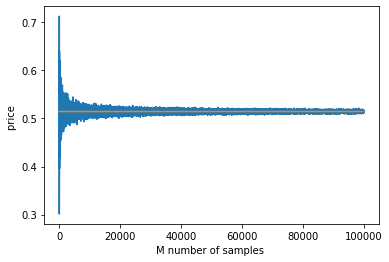

In [ ]:
plt.plot(np.arange(20,Max_MC-1),y2[20:])
plt.plot(np.arange(20,Max_MC-1),exact_price2*np.ones(len(np.arange(20,Max_MC-1))))
plt.ylabel('price ')
plt.xlabel('M number of samples ')

plt.show()

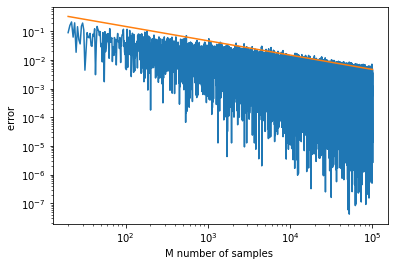

In [ ]:
plt.plot(np.arange(20,Max_MC-1),abs(y2[20:]-exact_price2))
plt.plot(np.arange(20,Max_MC-1),ff2(np.arange(20,Max_MC-1)))
plt.ylabel('error ')
plt.xlabel('M number of samples ')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
f = lambda x: (S0*np.exp( (r-sigma**2/2)*T + sigma*x) ) /(((S0*np.exp( (r-sigma**2/2)*T + sigma*x) )/K)**2 +1 )*(1/np.sqrt(2*np.pi*T))*np.exp(-0.5*(x**2)/T)
integrate.quad(f, -np.inf, np.inf)
exact_price3 =np.exp(-r*T)*integrate.quad(f, -np.inf, np.inf)[0] 
print(exact_price3)

48.556064546301315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [ ]:
f = lambda x: 2*np.exp(-x**2)
integrate.quad(f, -np.inf, np.inf)

(3.5449077018110318, 2.8405273561889847e-08)

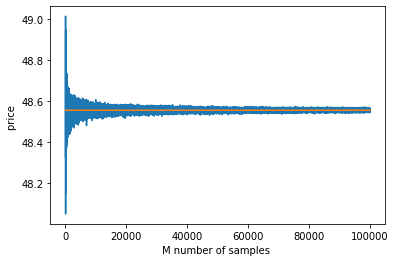

In [ ]:
plt.plot(np.arange(20,Max_MC-1),y3[20:])
plt.plot(np.arange(20,Max_MC-1),exact_price3*np.ones(len(np.arange(20,Max_MC-1))))
plt.ylabel('price ')
plt.xlabel('M number of samples ')

plt.show()

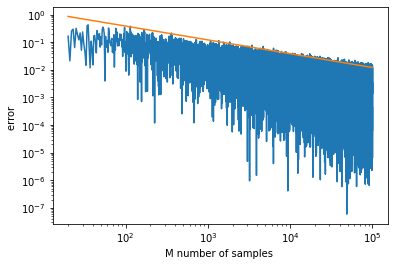

In [ ]:
plt.plot(np.arange(20,Max_MC-1),abs(y3[20:]-exact_price3))
plt.plot(np.arange(20,Max_MC-1),ff3(np.arange(20,Max_MC-1)))
plt.ylabel('error ')
plt.xlabel('M number of samples ')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import math
from scipy.linalg import expm
from matplotlib import pyplot as plt
import math
import scipy.stats
from scipy import integrate

In [ ]:


## Tri Diagonal Matrix Algorithm(a.k.a Thomas algorithm) solver
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [ ]:
S0 =100
K= 100
r= 0.04
sigma = 0.4
T = 0.25

In [ ]:
def BackwardEuler(M,N):
  t = np.linspace(0,T,N+1)
  s = np.linspace(0,10*S0,M)
  dt = t[1]-t[0]
  ds = s[1] - s[0]
  alpha  = np.zeros((M-2,1))
  for i in range(M-2):
    alpha[i] = 1 + sigma**2 * (i+1)**2 * dt + r*dt
  beta  = np.zeros((M-3,1))
  vega = np.zeros((M-3,1))
  for i in range(M-3):
    beta[i]= (-r*(i+1) - sigma**2 * (i+1)**2 ) *dt*0.5
  for i in range(M-3):
    vega[i] = (r*(i+2) - sigma**2 * (i+2)**2 )*dt*0.5
  
  
  values = np.zeros((M,N))
  for i in range(M):
    values[i,N-1] = np.maximum( ds*i - K , 0 )
  for i in range(N):
    values[0,i] = 0
  d = np.zeros((M-2,1))
  for n in range(N-1,0,-1):
    d[M-3] = (ds * (M-1)- K * np.exp(-r*(T-(n-1)*dt)))*(-r*(M-1) - sigma**2 * (M-1)**2 ) *dt*0.5
    values[1:M-1,n-1:n] = TDMAsolver(vega,alpha,beta,(values[1:M-1,n:n+1]-d))
  return values[M//10][0]


In [ ]:
calcul(10**4,2000)

8.438392696565174

In [ ]:
d1 = (np.log(S0/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
d2 = d1-(sigma)*np.sqrt(T)
exact_price1 = S0*scipy.stats.norm(0, 1).cdf(d1)-K*np.exp(-r*T)*scipy.stats.norm(0, 1).cdf(d2)

In [ ]:
s = np.linspace(0,2*S0,M)
s[M//2]

100.0

In [ ]:
def CrankNelson(M,N):
  t = np.linspace(0,T,N+1)
  s = np.linspace(0,10*S0,M)
  dt = t[1]-t[0]
  ds = s[1] - s[0]
  ###print(dt , ds)
  alpha  = np.zeros((M-2,1))
  for i in range(M-2):
    alpha[i] = 1 - sigma**2 * (i+1)**2 * dt*0.5 - 0.5*r*dt
  beta  = np.zeros((M-3,1))
  vega = np.zeros((M-3,1))
  for i in range(M-3):
    beta[i]= (r*(i+1) + sigma**2 * (i+1)**2 ) *dt*0.25
  for i in range(M-3):
    vega[i] = (-r*(i+2) + sigma**2 * (i+2)**2 )*dt*0.25
  A = np.zeros((M-2,M-2))
  np.fill_diagonal(A,alpha)
  for i in range(M-3):
    A[i+1,i]= vega[i]
    A[i,i+1]= beta[i]
  for i in range(M-2):
    alpha[i] = 1 + sigma**2 * (i+1)**2 * dt *0.5+ 0.5*r*dt
  for i in range(M-3):
    beta[i]= (-r*(i+1) -sigma**2 * (i+1)**2 ) *dt*0.25
  for i in range(M-3):
    vega[i] = (r*(i+2) - sigma**2 * (i+2)**2 )*dt*0.25
  
  
  values = np.zeros((M,N))
  for i in range(M):
    values[i,N-1] = np.maximum( ds*i - K , 0 )
  for i in range(N):
    values[0,i] = 0
  d1 = np.zeros((M-2,1))
  d2 = np.zeros((M-2,1))
  for n in range(N-1,0,-1):
    d2[M-3] = (ds * (M-1)- K * np.exp(-r*(T-(n-1)*dt)))*(-r*(M-1) - sigma**2 * (M-1)**2 ) *dt*0.25
    d1[M-3] = (ds * (M-1)- K * np.exp(-r*(T-(n)*dt)))*(r*(M-1) + sigma**2 * (M-1)**2 ) *dt*0.25
    values[1:M-1,n-1:n] = TDMAsolver(vega,alpha,beta,(np.dot(A,values[1:M-1,n:n+1])-d2+d1))
  return values[M//10][0]


In [ ]:
List_M = [10**x+1 for x in range(1,5)]
List_N = [2**x for x in range(1,13)]
for M in List_M:
  y1 = []
  y2 = []
  error_euler = []
  error_crak =[]
  for N in List_N:
    y1.append(abs(BackwardEuler(M,N)-exact_price1))
    y2.append(abs(CrankNelson(M,N)-exact_price1))
    error_euler.append((10*S0/M) ** 2  + T/N)
    error_crak.append((10*S0/M) ** 2  + (T/N)**2)
  plt.plot(List_N,y1,label = 'euler  error')
  plt.plot(List_N,y2,label = 'crak  error')
  plt.plot(List_N,error_euler,label ='euler theoritical  error')
  plt.plot(List_N,error_crak, label ='crak  theoritical error')
  plt.xscale('log', basex=2)
  plt.yscale('log')
  plt.legend()
  plt.title('simulation with M equal to '+str(M))
  plt.show()


In [ ]:
import numpy as np
import scipy.linalg as linalg


S0 = 100
K = 100
r = 0.04
T = 0.25
sigma = 0.4
Smax = 200

N=1000
M=1000

dt=T/float(N)
dS=Smax/float(M)
 
i_values = np.arange(M)
j_values = np.arange(N)
grid = np.zeros(shape=(M+1, N+1))

boundary_conds = np.linspace(0, Smax, M+1)
grid[:,-1] = np.maximum(0, boundary_conds - K)
grid[-1,:-1] = (Smax-K) * np.exp(-r*dt*(N-j_values))
alpha = 0.25*dt*((sigma**2)*(i_values**2) - r*i_values)
beta = -dt*0.5*((sigma**2)*(i_values**2) + r)
gamma = 0.25*dt*((sigma**2)*(i_values**2) +r*i_values)
M1 = -np.diag(alpha[2:M], -1) +  np.diag(1-beta[1:M]) -  np.diag(gamma[1:M-1], 1)
M2 = np.diag(alpha[2:M], -1) +  np.diag(1+beta[1:M]) + np.diag(gamma[1:M-1], 1)

P, L, U = linalg.lu(M1)

for j in reversed(range(N)):
    x1 = linalg.solve(
        L, np.dot(M2, grid[1:M, j+1]))
    x2 = linalg.solve(U, x1)
    grid[1:M, j] = x2

price3=np.interp(S0, boundary_conds, grid[:,0])
price3   

8.389127540509714

In [ ]:
CrankNelson(45001,11)

0.022727272727272728 0.022222222222222223
